Modelo 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6559 - loss: 0.9840 - val_accuracy: 0.8342 - val_loss: 0.4532
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8069 - loss: 0.5422 - val_accuracy: 0.8504 - val_loss: 0.4066
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8300 - loss: 0.4684 - val_accuracy: 0.8594 - val_loss: 0.3914
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8431 - loss: 0.4359 - val_accuracy: 0.8622 - val_loss: 0.3867
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8470 - loss: 0.4236 - val_accuracy: 0.8608 - val_loss: 0.3964
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8514 - loss: 0.4119 - val_accuracy: 0.8583 - val_loss: 0.3908
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8580 - loss: 0.3967 - val_accuracy: 0.8632 - val_loss: 0.3761
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8633 - loss: 0.3846 - val_accuracy: 0.

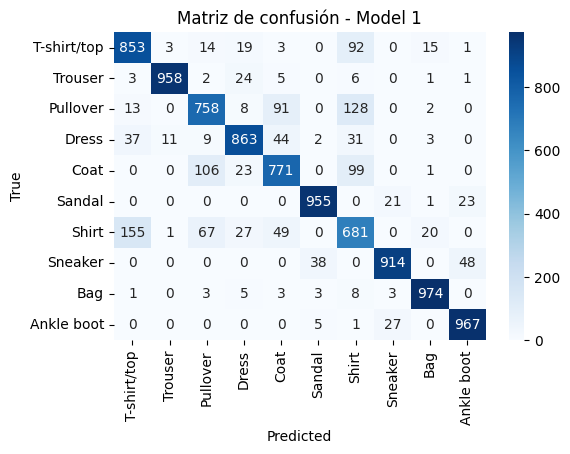

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0  # Normalizar valores de píxeles
X_test = X_test / 255.0
X_train_flat = X_train.reshape(X_train.shape[0], -1) #Se consultó a Chatgpt, está convirtiendo las imágenes 2D de 28x28 píxeles en vectores 1D de 784 valores (28 × 28 = 784), mis modelos requieren obtener un vector
X_test_flat = X_test.reshape(X_test.shape[0], -1)

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10) # Se consultó a Chatgpt, está convirtiendo las etiquetas de clase (números enteros del 0 al 9) en vectores one-hot, esto se debe a la función de pérdida utilizada en la red neuronal, para el caso de K-vecinos esto no es necesario.
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

model1 = Sequential([
    Dense(100, activation='elu', input_shape=(784,), kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model1.fit(
    X_train_flat, y_train_onehot,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

y_pred1 = model1.predict(X_test_flat)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

f1_model1 = f1_score(y_test, y_pred_classes1, average='weighted')
cm_model1 = confusion_matrix(y_test, y_pred_classes1)

print(f"F1-Score para el Modelo 1: {f1_model1}")

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
    "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_model1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión - Model 1')
plt.show()

Modelo 2

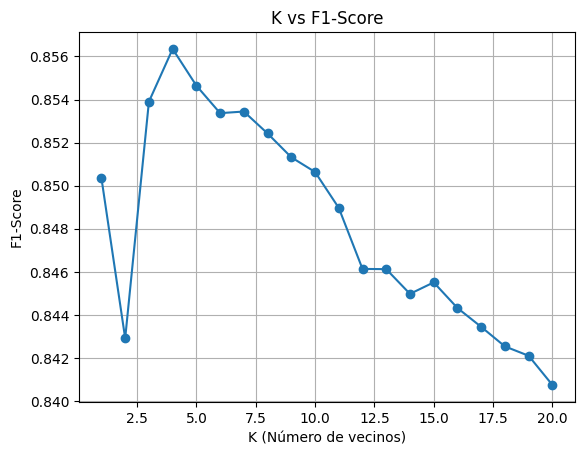

El mejor valor de K es: 4
F1-Score para K=4: 0.8563494820026253


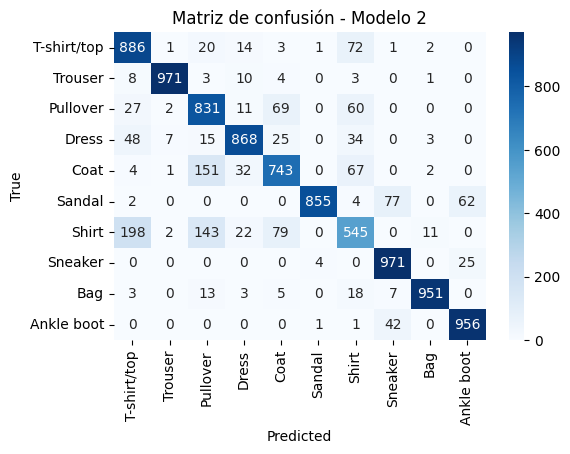

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Lista para almacenar los F1-scores
f1_scores_knn = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_pred_knn = knn.predict(X_test_flat)
    f1_scores_knn.append(f1_score(y_test, y_pred_knn, average='weighted'))

plt.plot(range(1, 21), f1_scores_knn, marker='o')
plt.title("K vs F1-Score")
plt.xlabel("K (Número de vecinos)")
plt.ylabel("F1-Score")
plt.grid(True)
plt.show()

best_k = np.argmax(f1_scores_knn) + 1
print(f"El mejor valor de K es: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_flat, y_train)
y_pred_knn_best = knn_best.predict(X_test_flat)

f1_model_knn = f1_score(y_test, y_pred_knn_best, average='weighted')
print(f"F1-Score para K={best_k}: {f1_model_knn}")

cm_model2 = confusion_matrix(y_test, y_pred_knn_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión - Modelo 2')
plt.show()

Modelo 3

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6462 - loss: 1.0793 - val_accuracy: 0.8439 - val_loss: 0.4374
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8181 - loss: 0.5142 - val_accuracy: 0.8577 - val_loss: 0.3840
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8346 - loss: 0.4566 - val_accuracy: 0.8602 - val_loss: 0.3781
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8431 - loss: 0.4340 - val_accuracy: 0.8645 - val_loss: 0.3639
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8546 - loss: 0.4030 - val_accuracy: 0.8726 - val_loss: 0.3522
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8575 - loss: 0.3927 - val_accuracy: 0.8740 - val_loss: 0.3475
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8621 - loss: 0.3818 - val_accuracy: 0.8737 - val_loss: 0.3448
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8644 - loss: 0.3703 - val_accuracy: 0.8732 - val_

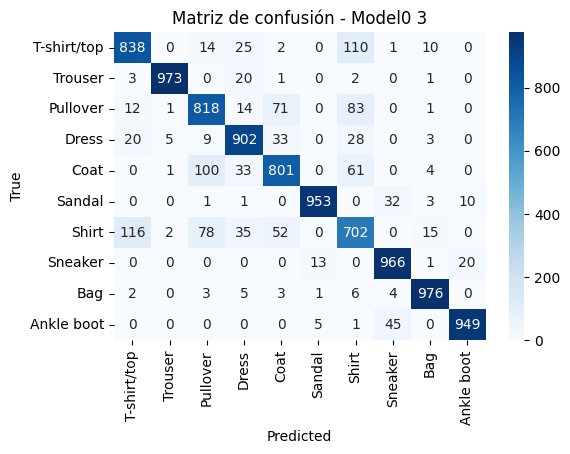

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat) #Intento reducir la dimensionalidad
X_test_pca = pca.transform(X_test_flat)

model3 = Sequential([
    Dense(100, activation='elu', input_shape=(X_train_pca.shape[1],), kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history3 = model3.fit(
    X_train_pca, y_train_onehot,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

y_pred3 = model3.predict(X_test_pca)
y_pred_classes3 = np.argmax(y_pred3, axis=1)

f1_model3 = f1_score(y_test, y_pred_classes3, average='weighted')
cm_model3 = confusion_matrix(y_test, y_pred_classes3)

print(f"F1-Score para el Modelo 3 (Red Neuronal con PCA): {f1_model3}")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_model3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión - Model0 3')
plt.show()

Modelo 4

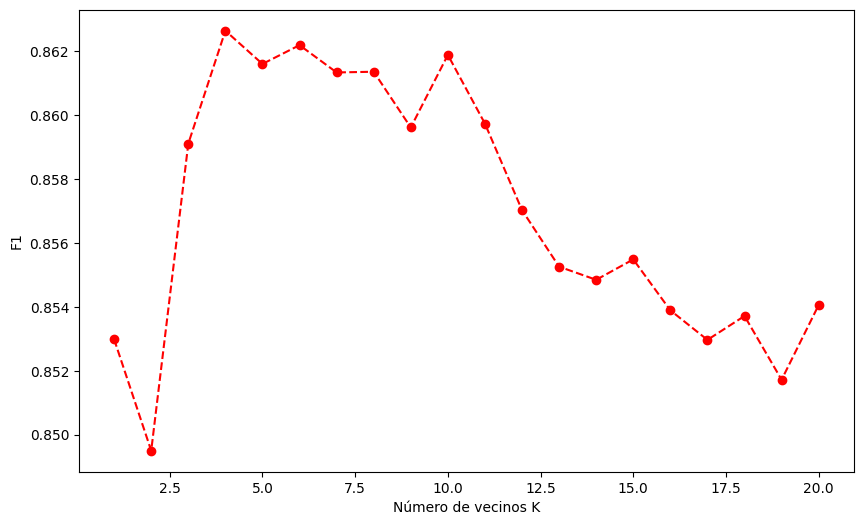

El mejor número de K (con PCA) es: 4
F1-Score para el Modelo 4 (KNN con PCA, K=4): 0.8626324275325178


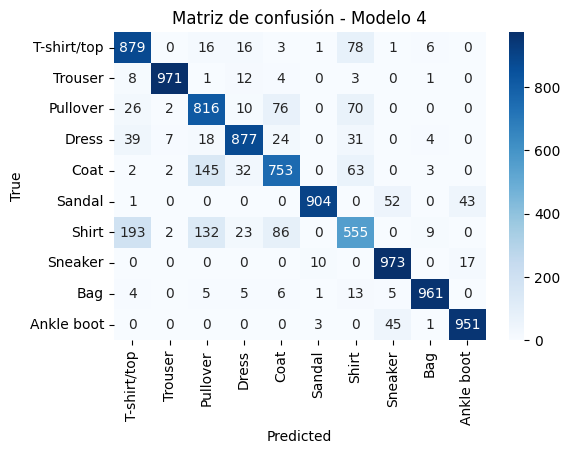

In [7]:
f1_scores_pca = []

for k in range(1, 21):
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca = knn_pca.predict(X_test_pca)
    f1_scores_pca.append(f1_score(y_test, y_pred_pca, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), f1_scores_pca, marker='o', linestyle='--', color='red')
plt.xlabel('Número de vecinos K')
plt.ylabel('F1')
plt.show()

best_k_pca = np.argmax(f1_scores_pca) + 1
print(f"El mejor número de K (con PCA) es: {best_k_pca}")

knn_pca_best = KNeighborsClassifier(n_neighbors=best_k_pca)
knn_pca_best.fit(X_train_pca, y_train)
y_pred_pca_best = knn_pca_best.predict(X_test_pca)

f1_model4 = f1_score(y_test, y_pred_pca_best, average='weighted')
cm_model4 = confusion_matrix(y_test, y_pred_pca_best)

print(f"F1-Score para el Modelo 4 (KNN con PCA, K={best_k_pca}): {f1_model4}")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_model4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión - Modelo 4')
plt.show()